#### Written By-Sparsh Goil

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
dataset=pd.read_excel("/home/spaggy/Downloads/BreastCancer_Prognostic_v1.xlsx")

In [3]:
dataset

,ID,Outcome,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,Worst_perimeter,Worst_area,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size,Lymph_Node_Status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,...,139.70,1436.0,0.11950,0.19260,0.31400,0.11700,0.2677,0.08113,5.0,5
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,...,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,...,159.10,1949.0,0.11880,0.34490,0.34140,0.20320,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,...,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,2.0,0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,...,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,3.5,0
5,843786,R,77,12.75,15.29,84.60,502.7,0.11890,0.15690,0.16640,...,107.30,733.2,0.17060,0.41960,0.59990,0.17090,0.3485,0.11790,2.5,0
6,844359,N,60,18.98,19.61,124.40,1112.0,0.09087,0.12370,0.12130,...,152.60,1593.0,0.11440,0.33710,0.29900,0.19220,0.2726,0.09581,1.5,?
7,844582,R,77,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,...,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,4.0,10
8,844981,N,119,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,...,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,2.0,1
9,845010,N,76,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,...,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,6.0,20


In [102]:
#dataset["Lymph_Node_Status"]=dataset["Lymph_Node_Status"].astype(float)
list=["ID","Outcome","Time","Lymph_Node_Status"]
data=dataset.drop(list,axis=1)

In [103]:
data.shape

(198, 31)

In [104]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,Worst_texture,Worst_perimeter,Worst_area,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size
count,198.000000,198.00000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,...,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,17.412323,22.27601,114.856566,970.040909,0.102681,0.142648,0.156243,0.086776,0.192754,0.062706,...,30.139091,140.347778,1404.958586,0.143921,0.365102,0.436685,0.178778,0.323404,0.090828,2.847475
std,3.161676,4.29829,21.383402,352.149215,0.012522,0.049898,0.070572,0.033877,0.027437,0.007240,...,6.017777,28.892279,586.006972,0.022004,0.163965,0.173625,0.045181,0.075161,0.021172,1.937964
min,10.950000,10.38000,71.900000,361.600000,0.074970,0.046050,0.023980,0.020310,0.130800,0.050250,...,16.670000,85.100000,508.100000,0.081910,0.051310,0.023980,0.028990,0.156500,0.055040,0.400000
25%,15.052500,19.41250,98.160000,702.525000,0.093900,0.110200,0.106850,0.063670,0.174075,0.056718,...,26.210000,118.075000,947.275000,0.129325,0.248700,0.322150,0.152650,0.275950,0.076577,1.500000
50%,17.290000,21.75000,113.700000,929.100000,0.101900,0.131750,0.151350,0.086075,0.189350,0.061715,...,30.135000,136.500000,1295.000000,0.141850,0.351300,0.402350,0.179250,0.310300,0.086890,2.500000
75%,19.580000,24.65500,129.650000,1193.500000,0.110975,0.172200,0.200500,0.103925,0.209325,0.066715,...,33.555000,159.875000,1694.250000,0.154875,0.423675,0.541050,0.207125,0.358800,0.101375,3.500000
max,27.220000,39.28000,182.100000,2250.000000,0.144700,0.311400,0.426800,0.201200,0.304000,0.097440,...,49.540000,232.200000,3903.000000,0.222600,1.058000,1.170000,0.290300,0.663800,0.207500,10.000000


In [105]:
data_normalized=(data-data.mean())/data.std()

In [106]:
data_normalized

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,Worst_texture,Worst_perimeter,Worst_area,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size
0,0.192201,1.238630,0.123621,0.121991,-0.622197,-0.782558,-0.675092,-0.478962,-0.227943,0.086262,...,1.153401,-0.022420,0.052971,-1.109835,-1.052065,-0.706613,-1.367349,-0.741131,-0.458065,1.110715
1,0.182712,-2.767615,0.371477,0.087915,1.255234,2.704583,2.038439,1.780708,1.791237,2.210709,...,-2.128542,1.531628,1.047840,0.830725,1.832697,1.585114,1.917253,1.818711,1.325898,0.078704
2,1.251766,-1.125101,1.058926,1.144285,-1.143661,-0.475930,-0.435621,-0.146874,1.477790,-0.359900,...,-1.522006,0.649039,0.928387,-1.141647,-0.123208,-0.548801,0.540553,1.463473,-0.007469,-0.179299
3,-1.895300,-0.441108,-1.743248,-1.658220,3.179781,2.830842,1.206667,0.543867,2.439998,4.797894,...,-0.604723,-1.435601,-1.428752,2.993972,3.056739,1.441125,1.742399,4.528897,3.881163,-0.437302
4,0.910175,-1.846318,0.946689,0.928467,-0.190172,-0.197360,0.591695,0.517300,-0.432048,-0.535326,...,-2.238217,0.410221,0.290170,-0.296345,-0.976439,-0.211291,-0.360278,-1.157571,-0.663525,0.336707
5,-1.474637,-1.625300,-1.414956,-1.327110,1.295163,0.285629,0.143927,-0.298601,0.245872,1.234126,...,-1.623372,-1.143827,-1.146332,1.212474,0.332377,0.940044,-0.174357,0.333897,1.278666,-0.179299
6,0.495837,-0.620249,0.446301,0.403122,-0.943220,-0.379733,-0.495135,0.068613,-0.730915,-0.695557,...,-0.779206,0.424066,0.320886,-1.341611,-0.170779,-0.793006,0.297085,-0.675937,0.235305,-0.695304
7,-1.171000,-0.336415,-1.153070,-1.113565,1.295163,0.437941,-0.886790,-0.794814,0.978462,1.630561,...,-0.332198,-1.029610,-0.866813,0.976153,0.018895,-0.972704,-0.512998,-0.050612,1.146415,0.594709
8,-1.395565,-0.106091,-1.279336,-1.278552,1.965959,1.013119,0.420239,0.199382,1.539750,1.544920,...,0.098194,-1.181900,-1.135923,1.198841,1.067290,0.589287,0.602527,1.522014,0.773280,-0.437302
9,-1.566360,0.410393,-1.444418,-1.403215,1.271206,1.943024,1.006872,-0.039721,0.373437,2.724555,...,1.751628,-1.477827,-1.183533,1.880536,4.225890,3.849195,0.934528,1.506049,5.510676,1.626720


### Feature Selection

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

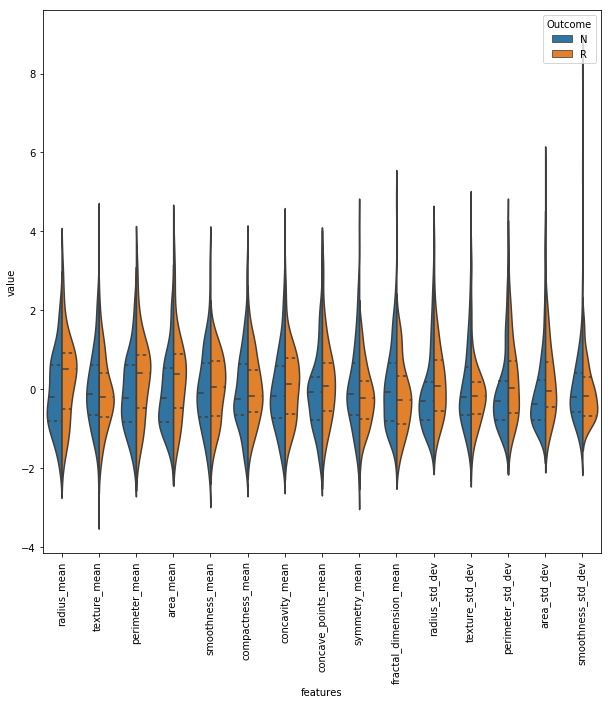

In [15]:
# Violin Plots
le=LabelEncoder()
y=le.fit_transform(dataset['Outcome'])
data = pd.concat([dataset["Outcome"],data_normalized.iloc[:,0:15]],axis=1)
data = pd.melt(data,id_vars="Outcome",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="Outcome", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

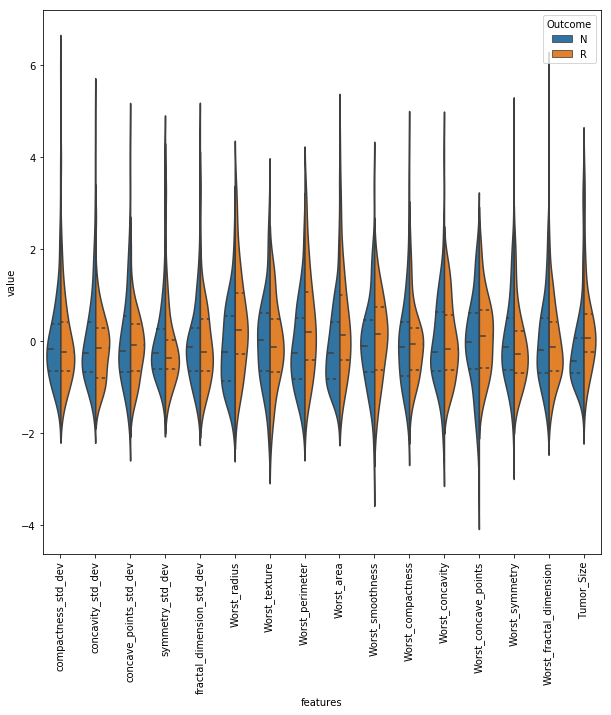

In [17]:
le=LabelEncoder()
y=le.fit_transform(dataset['Outcome'])
data = pd.concat([dataset["Outcome"],data_normalized.iloc[:,15:]],axis=1)
data = pd.melt(data,id_vars="Outcome",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="Outcome", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

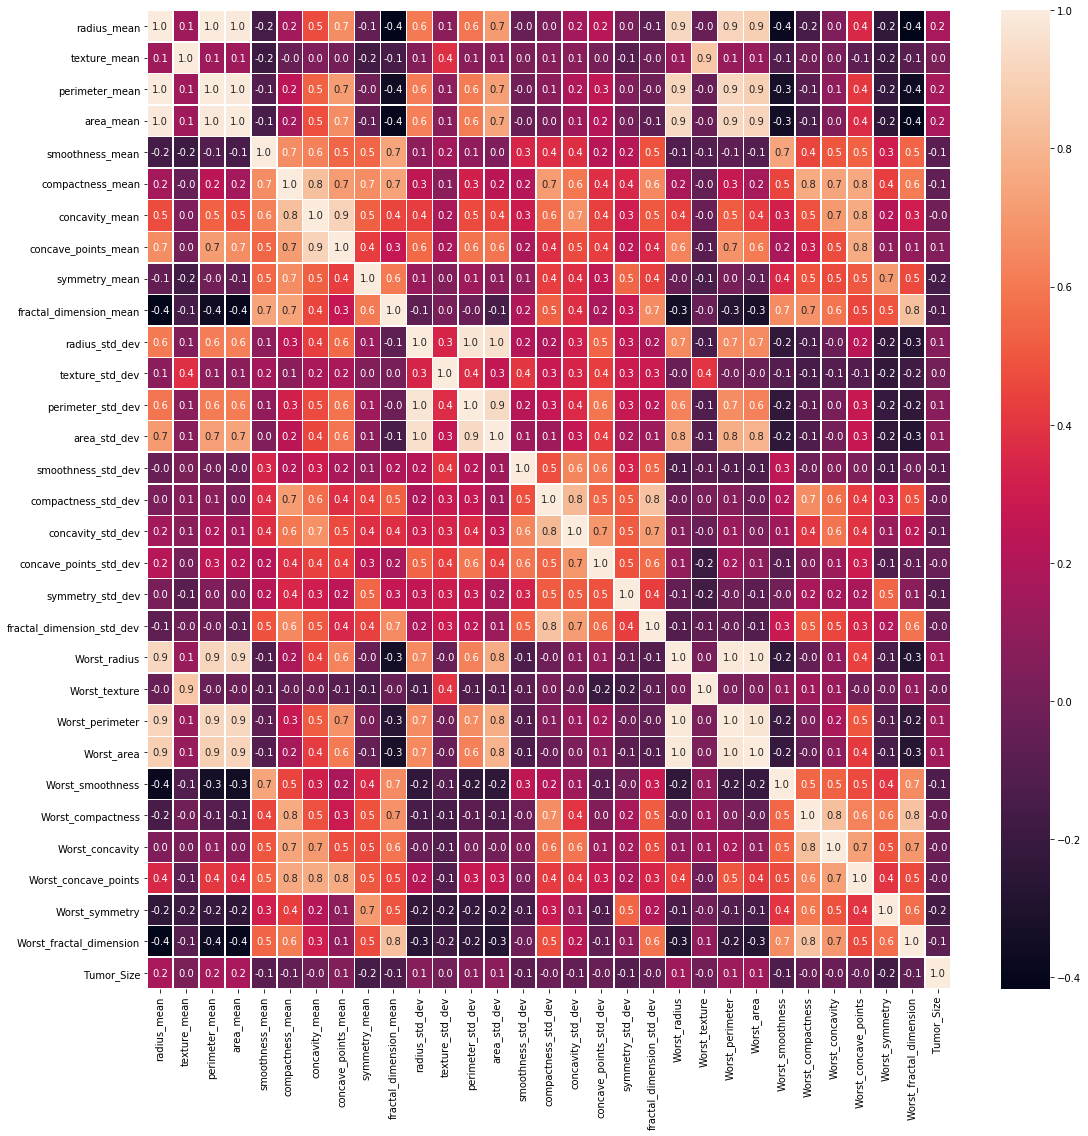

In [94]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data_normalized.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [95]:
# We will remove all set of correlated features
Drop_features=["radius_mean","perimeter_mean","concavity_mean","concave_points_mean","texture_mean","radius_std_dev",
               "perimeter_std_dev","concavity_std_dev","Worst_radius","Worst_perimeter","Worst_area","Worst_compactness"]
data_normalized=data_normalized.drop(Drop_features,axis=1)

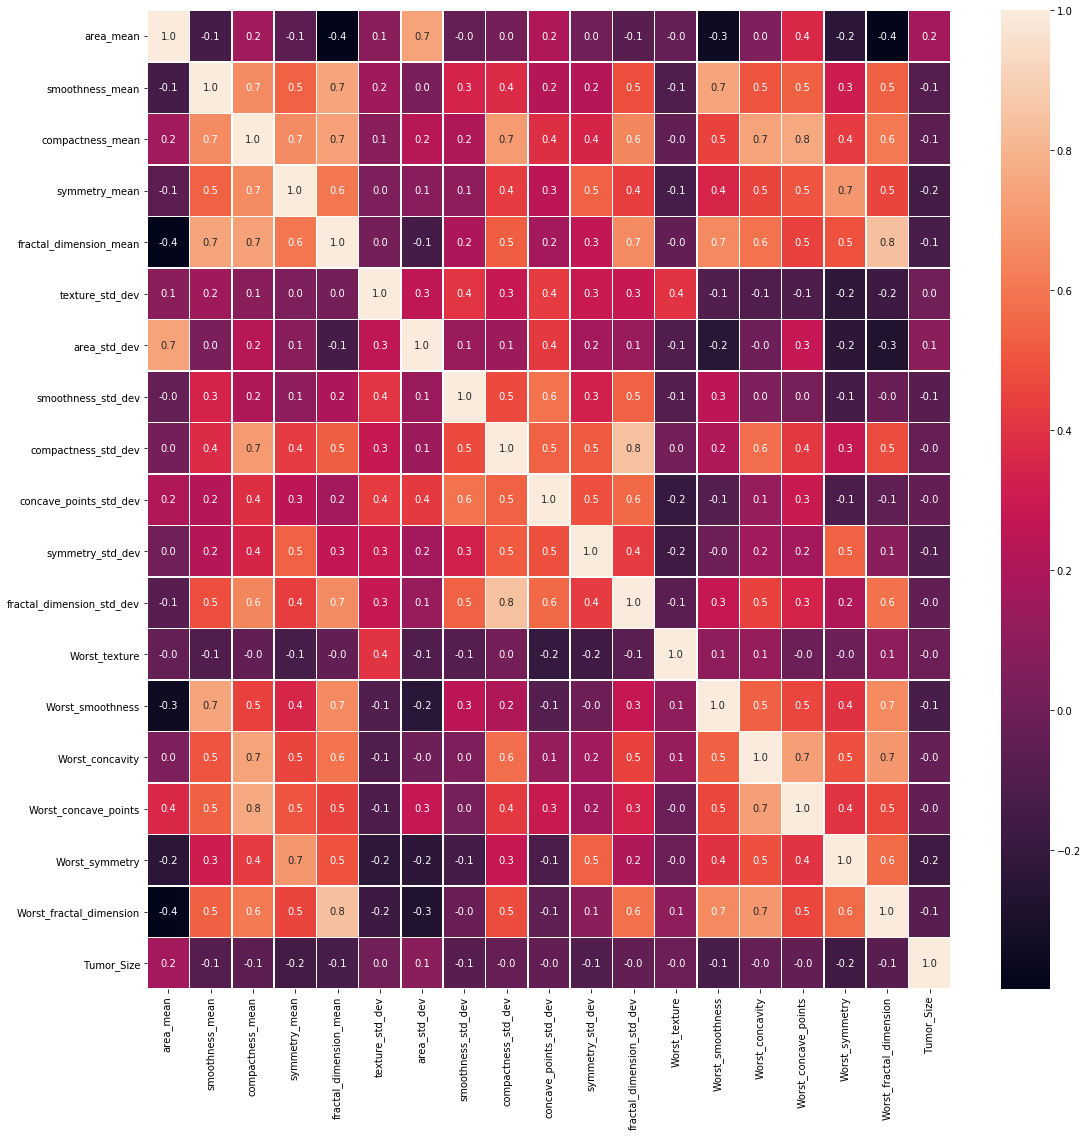

In [96]:
#correlation map after feature selection
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data_normalized.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [114]:
# Divide train test dataset in 80:20
le=LabelEncoder()
y=le.fit_transform(dataset['Outcome'])
data_normalized["ID"]=dataset["ID"]
X_train, X_test, y_train, y_test = train_test_split(data_normalized, y, test_size=0.20, random_state=42)


In [120]:
X_train=X_train.drop("ID",axis=1)
Y_ID=X_test["ID"].tolist()
X_test=X_test.drop("ID",axis=1)

## Model- Random Forest Classifier

In [131]:
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(X_train,y_train)

In [133]:
Results=pd.DataFrame(Y_ID,columns=["ID"])
Results["Classifier_Task1"]=y_pred

Accuracy on test dataset is: 82.5%


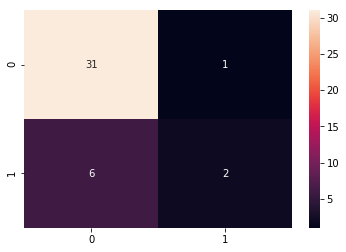

In [40]:
# plot confusion matrix
y_pred=clf_rf.predict(X_test)
ac = accuracy_score(y_test,y_pred)
print('Accuracy on test dataset is: {}%'.format(100*ac))
cm = confusion_matrix(y_test,clf_rf.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

In [45]:
#false negatives
tn, fp, fn, tp = cm.ravel()
print(fn)

6


### Task-2 Regression using Polynominal regression with n=3

In [84]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [107]:
# Divide train test dataset in 80:20
le=LabelEncoder()
y=le.fit_transform(dataset['Time'])
y-y.mean()/y.std()
X_train, X_test, y_train, y_test = train_test_split(data_normalized, y, test_size=0.20, random_state=42)

In [108]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(3)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [135]:
Results["Regression Task-2"]=model.predict(X_test_poly)

In [136]:
Results

,ID,Classifier_Task1,Regression Task-2
0,869104,0,25.807435
1,8910988,0,4.679475
2,8511133,0,30.216676
3,905241,0,43.956477
4,913535,0,89.195068
5,897428,0,30.849159
6,903516,0,59.152195
7,855133,0,-217.295020
8,852552,1,-18.636880
9,9212009,0,-35.318806


In [137]:
model = LinearRegression()
model.fit(X_train_poly, y_train)
y_pred = model.predict(X_test_poly)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

0.9978915107743229

In [141]:
Results.to_excel("output.xlsx",sheet_name='Sheet_name_1')  